# 📊 ASR Plots:

Radar Plots merged with Circular Barplot:
1. 🧮 ASR of *Mathematical attacks*.
1. 🖼️ ASR of *Non-mathematical attacks*.

In [1]:
# Imports
from matplotlib.patches             import Circle, RegularPolygon
from matplotlib.path                import Path
from matplotlib.projections.polar   import PolarAxes
from matplotlib.projections         import register_projection
from matplotlib.spines              import Spine
from matplotlib.transforms          import Affine2D
import matplotlib.colors    as mcolors
import numpy                as np
import pandas               as pd
import seaborn              as sns
import matplotlib.pyplot    as plt

In [2]:
# Parameters
SMALL_SIZE  = 20
MEDIUM_SIZE = 24
BIGGER_SIZE = 32

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
# Paths
DATA_PATH   = '../results/attacks/evaluation/'
RESULTS_PATH = './figures/'

ATTACKS_LIST = ['BIM','DeepFool','FGSM','PGD','RFGSM','TIFGSM','Square']
TASKS_LIST   = ['bikeMotorbike','catDog','manWoman',]

In [4]:
# Function for DUMB Cases
def rainbow(src_ds, trg_ds, src_b, trg_b, src_m, trg_m):
    if src_ds == trg_ds and src_b == trg_b and src_m == trg_m:
        return "C1"
    elif src_ds == trg_ds and src_b != trg_b and src_m == trg_m:
        return "C2"
    elif src_ds == trg_ds and src_b == trg_b and src_m != trg_m:
        return "C3"
    elif src_ds == trg_ds and src_b != trg_b and src_m != trg_m:
        return "C4"
    elif src_ds != trg_ds and src_b == trg_b and src_m == trg_m:
        return "C5"
    elif src_ds != trg_ds and src_b != trg_b and src_m == trg_m:
        return "C6"
    elif src_ds != trg_ds and src_b == trg_b and src_m != trg_m:
        return "C7"
    elif src_ds != trg_ds and src_b != trg_b and src_m != trg_m:
        return "C8"
    return -1

## 1) 🧮 Mathematical Attacks

#### a) Load Data

In [5]:
taskListDF = []
for task in TASKS_LIST:
    attacksListDF = []
    for attack in ATTACKS_LIST:
        tmpDF = pd.read_csv(DATA_PATH + "{}/evaluations_{}.csv".format(task,attack))
        tmpDF['case'] = tmpDF.apply(lambda x: rainbow(x.source_dataset, x.target_dataset, x.source_balancing, x.target_balancing, x.source_model, x.target_model) ,axis = 1)
        attacksListDF.append(tmpDF)

    taskDF = pd.concat(attacksListDF)
    taskDF['Dataset'] = task
    taskListDF.append(taskDF)

df = pd.concat(taskListDF)

#### b) Circular Barplot + Radar Plot

In [6]:
# PARAMETERS
Y_LIM_START = -1.5
Y_LIM_END   = 1.25

COLORS = ["#89CFFD", "#FFCB42", "#68B984", "#BFACE2", "#F0A04B", "#5DA7DB","#E96479"]

DATASET bikeMotorbike
DATASET catDog
DATASET manWoman


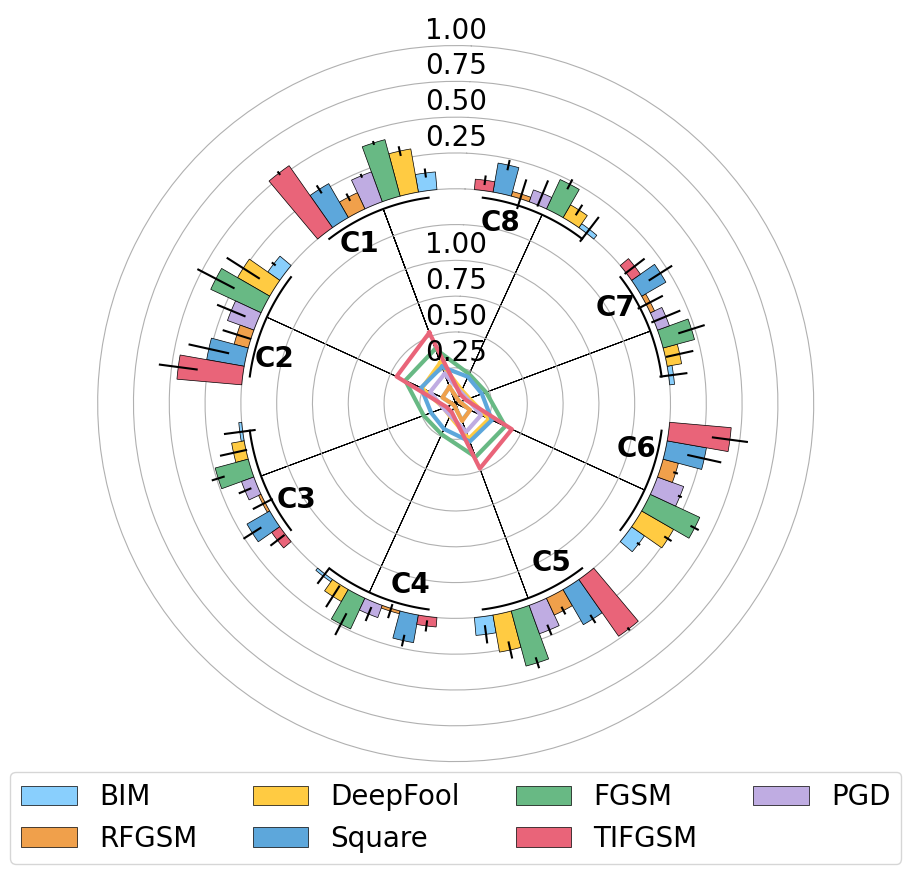

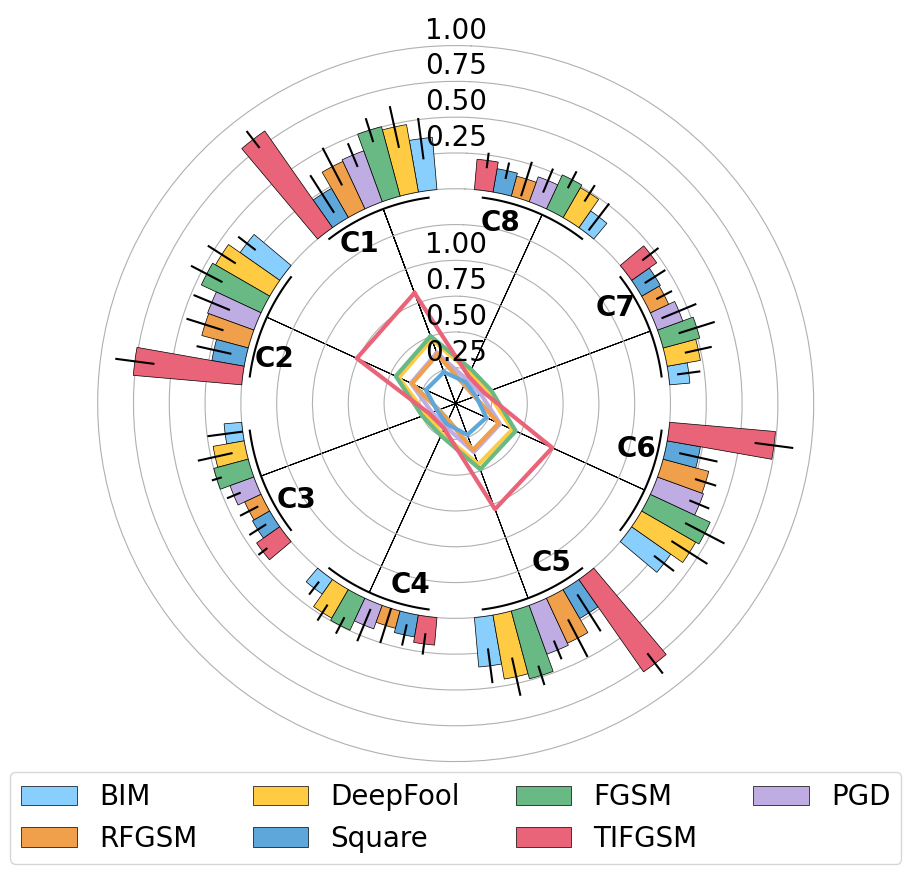

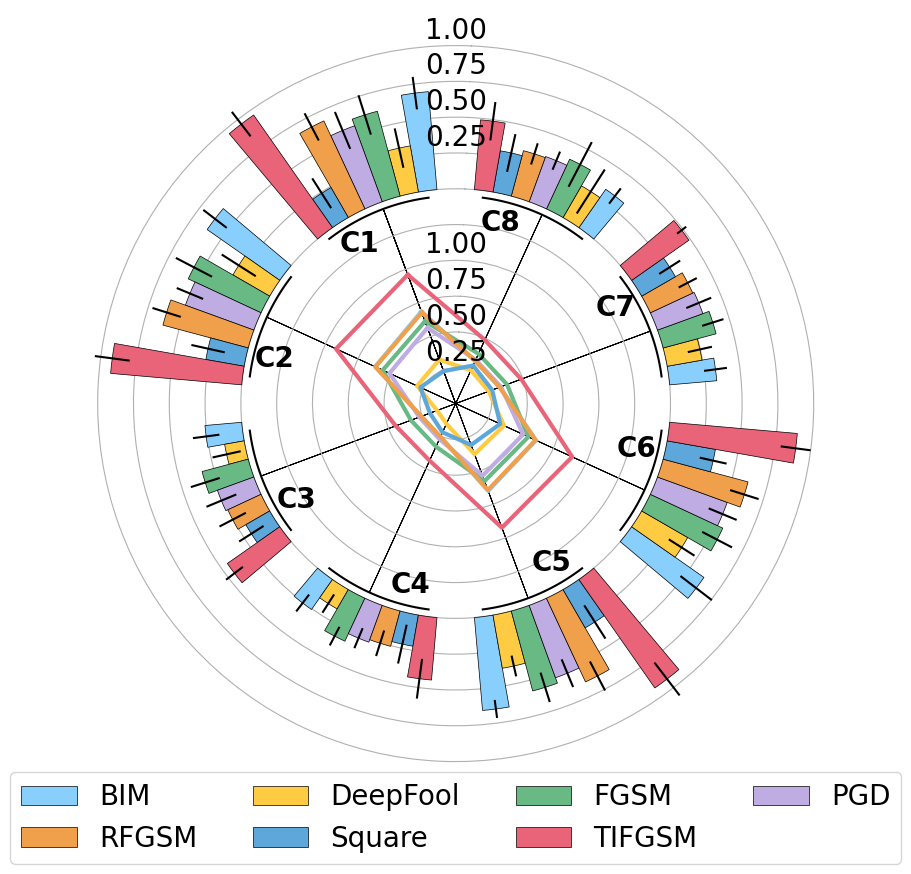

In [7]:
for d in df.Dataset.unique():
    
    # Get all the Data
    print("DATASET {}".format(d))
    curr_df = df[df["Dataset"] == d]
    df_chart = curr_df[["attack", "case", "asr"]]
    df_chart = df_chart[df_chart["attack"] != "SplitMergeRGB"]
    error_df = df_chart.groupby(['attack', 'case'], as_index= False).std()
    df_chart = df_chart.groupby(['attack', 'case'], as_index= False).mean()
    df_chart = df_chart.sort_values(["case","attack"])

    # Get the values from the DF
    VALUES      = df_chart["asr"].values
    LABELS      = df_chart["attack"].values
    GROUP       = df_chart["case"].values
    ERRORS      = error_df["asr"].values
    GROUPS_SIZE = [len(list(set(LABELS.tolist())))] * len(list(set(GROUP.tolist())))
   
    # For the Circular Bar Plot
    PAD = 2
    ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
    ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
    WIDTH = (2 * np.pi) / len(ANGLES)
    OFFSET = np.pi / 2 - WIDTH/2

    # Calculate offset for bars considering the padding
    offset = 0
    IDXS = []  
    for size in GROUPS_SIZE:
        IDXS += list(range(offset + PAD, offset + size + PAD))
        offset += size + PAD

    # FIGURE
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={"projection": "polar"})
    #ax.set_title(d,size=BIGGER_SIZE,pad=10)
    ax.set_frame_on(False)

    # X AXIS
    ax.set_theta_offset(OFFSET)
    ax.xaxis.grid(False)
    ax.set_xticks([])
    # Y AXIS
    ax.set_ylim(Y_LIM_START, Y_LIM_END)
    ax.set_yticks(list(np.arange(Y_LIM_START,Y_LIM_END,0.25)))
    ax.set_yticklabels([])
    
    # PLOT
    ax.bar(ANGLES[IDXS], VALUES, width=WIDTH, color = COLORS, yerr = ERRORS, edgecolor="black", linewidth=0.5, label=LABELS, zorder=2)

    # LEGEND
    # Handles
    handles, labels = ax.get_legend_handles_labels()
    uniqueLabels = list(set(labels))
    uinqueHandles = [handles[labels.index(label)] for label in uniqueLabels]
  
    sortedHandles, sortedLabels = zip(*sorted(zip(uinqueHandles, uniqueLabels), key=lambda x: x[1]))

    customSortedHandles = []
    customSortedLabels  = []
    customSortedHandles.extend([sortedHandles[0],sortedHandles[4],sortedHandles[1],sortedHandles[5],sortedHandles[2],sortedHandles[6],sortedHandles[3]])
    customSortedLabels.extend([sortedLabels[0],sortedLabels[4],sortedLabels[1],sortedLabels[5],sortedLabels[2],sortedLabels[6],sortedLabels[3]])

    legendPosition = (0.5, 0.05)
    legendColumns = 4
    ax.legend(customSortedHandles, customSortedLabels, loc='upper center', bbox_to_anchor=legendPosition, ncol=legendColumns)

    # TEXT 
    offset = 0 
    for group, size in zip(["C{}".format(i) for i in range (1,9)], GROUPS_SIZE):
        # Add line below bars
        x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=len(VALUES))
        ax.plot(x1, [-0.05] * len(VALUES), color="black")
    
        # Add text to indicate group
        ax.text(np.mean(x1)+0.15, -0.2, group, color="black", fontsize=SMALL_SIZE,fontweight="bold", ha="center", va="center",zorder=2)
        
        offset += size + PAD 

    for step in np.arange(0.25, Y_LIM_END, 0.25):
        ax.text(OFFSET - np.pi / 2 + WIDTH, step + 0.05, "{:.2f}".format(step), ha="center", size=SMALL_SIZE)
       
    # JOJO
    for a, color in zip(df_chart.attack.unique(), COLORS):  
        y = df_chart[df_chart["attack"] == a]["asr"].tolist()
        y.append(y[0])
        offset = 0.4
        theta = np.linspace(offset, offset + 2*np.pi, 9)
        ax.plot(theta, np.array(y) + Y_LIM_START, color=color,linewidth=3)

        # Add dashed vertical lines. These are just references
        ax.vlines(theta, Y_LIM_START, -0.05, color="black", linewidth=0.5, zorder=0)

        ax.set_xticks([])

    for step in np.arange(Y_LIM_START + 0.25, -0.25, 0.25):
        ax.text(OFFSET - np.pi / 2 + WIDTH, step + 0.05, "{:.2f}".format(step + Y_LIM_END + 0.25), ha="center", size=SMALL_SIZE)

    plt.tight_layout()
    plt.savefig(RESULTS_PATH + "mathRadarBarplot{}.pdf".format(d.replace(" ", "")))

#### c) Circular Barplot + Radar Plot (Pyramid Subplots Shape)

In [8]:
# PARAMETERS
Y_LIM_START = -1.5
Y_LIM_END   = 1.25

COLORS = ["#89CFFD", "#FFCB42", "#68B984", "#BFACE2", "#F0A04B", "#5DA7DB","#E96479"]

DATASET bikeMotorbike
DATASET catDog
DATASET manWoman


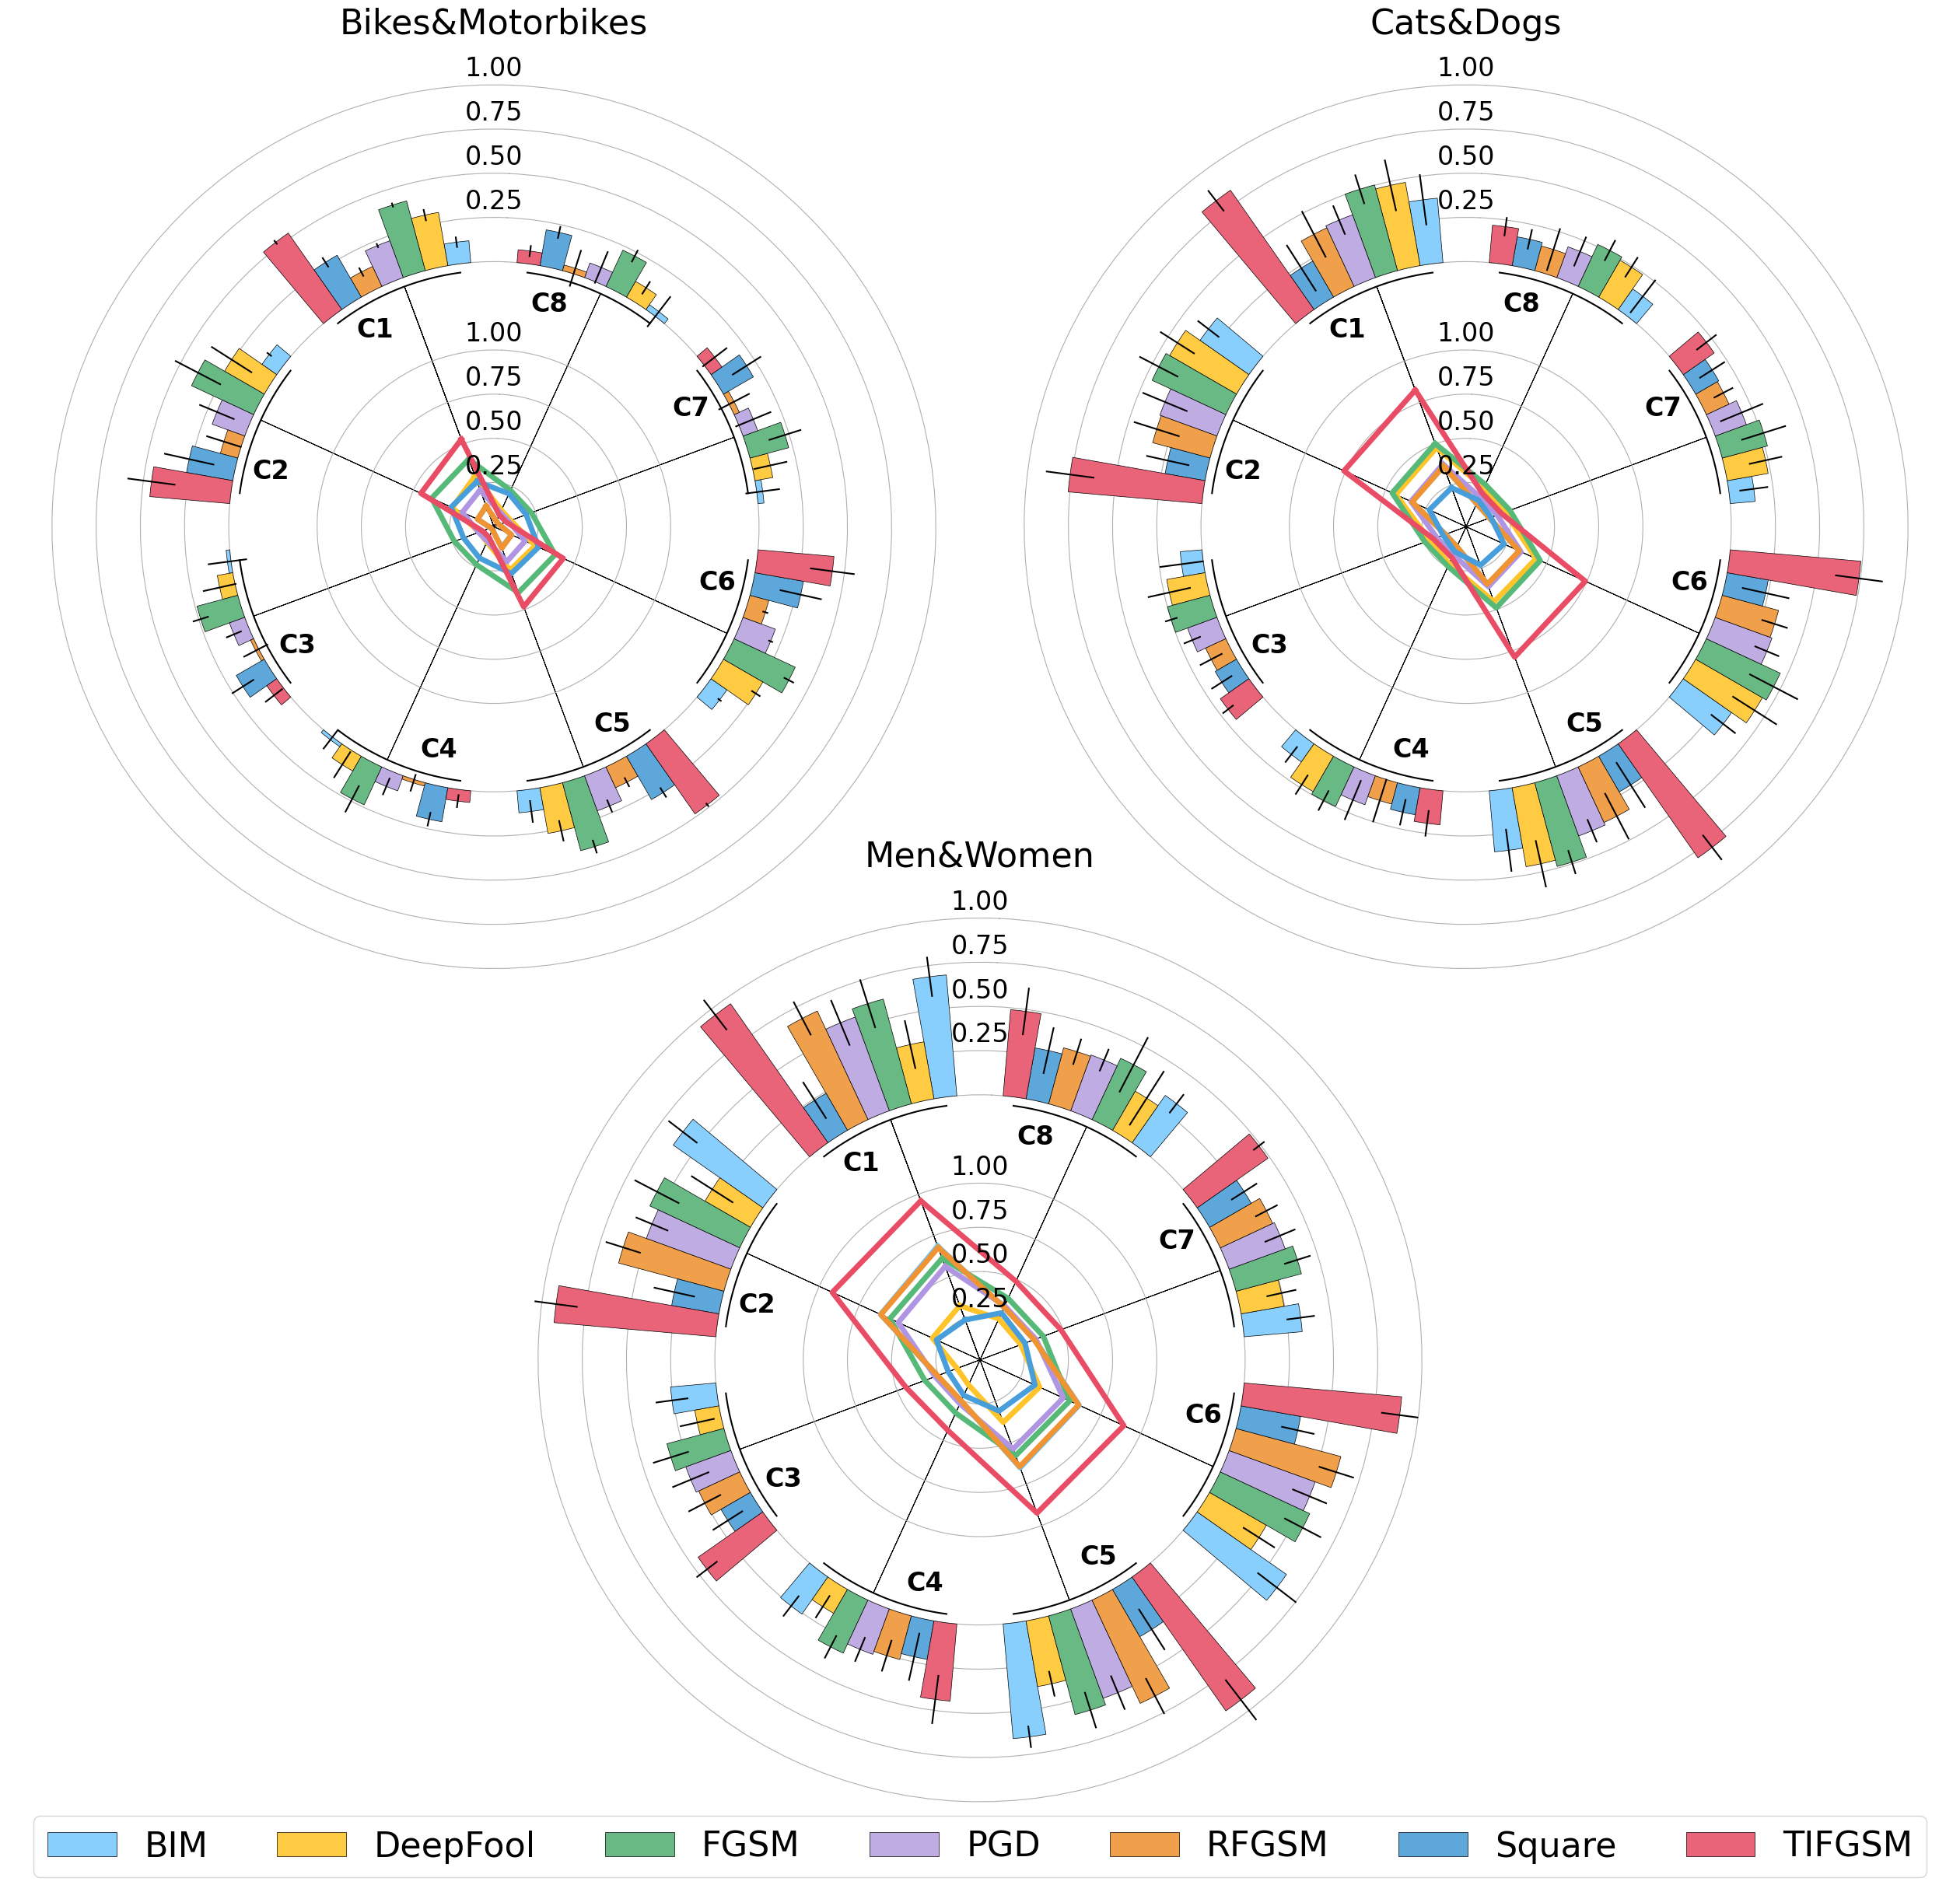

In [9]:
fig = plt.figure(figsize=(25, 25))

axs = []
axs.append(plt.subplot2grid((2,4),(0,0), colspan=2, projection='polar'))
axs.append(plt.subplot2grid((2,4),(0,2), colspan=2, projection='polar'))
axs.append(plt.subplot2grid((2,4),(1,1), colspan=2, projection='polar'))

#fig, axs = plt.subplots(figsize=(26, 27), nrows=2, ncols=2, subplot_kw={"projection": "polar"})
fig.subplots_adjust(left=0, bottom=0, right=1, top=1,wspace=0.0, hspace=-0.25)

for ax, d in zip(axs, df.Dataset.unique()):
 
    #Set the title 
    if d == 'bikeMotorbike':
        title = "Bikes&Motorbikes"
    if d == 'catDog':
        title = "Cats&Dogs"
    if d == 'manWoman':
        title = "Men&Women"
    ax.set_title(title, size=BIGGER_SIZE, position=(0.5, 1.1), horizontalalignment='center', verticalalignment='center')

    # Get all the Data
    print("DATASET {}".format(d))
    curr_df = df[df["Dataset"] == d]
    df_chart = curr_df[["attack", "case", "asr"]]
    df_chart = df_chart[df_chart["attack"] != "SplitMergeRGB"]
    error_df = df_chart.groupby(['attack', 'case'], as_index= False).std()
    df_chart = df_chart.groupby(['attack', 'case'], as_index= False).mean()
    df_chart = df_chart.sort_values(["case","attack"])

    # Get the values from the DF
    VALUES      = df_chart["asr"].values
    LABELS      = df_chart["attack"].values
    GROUP       = df_chart["case"].values
    ERRORS      = error_df["asr"].values
    GROUPS_SIZE = [len(list(set(LABELS.tolist())))] * len(list(set(GROUP.tolist())))
   
    # For the Circular Bar Plot
    PAD = 2
    ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
    ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
    WIDTH = (2 * np.pi) / len(ANGLES)
    OFFSET = np.pi / 2 - WIDTH/2

    # Calculate offset for bars considering the padding
    offset = 0
    IDXS = []  
    for size in GROUPS_SIZE:
        IDXS += list(range(offset + PAD, offset + size + PAD))
        offset += size + PAD

    # FIGURE
    #ax.set_title(d,size=BIGGER_SIZE,pad=10)
    ax.set_frame_on(False)

    # X AXIS
    ax.set_theta_offset(OFFSET)
    ax.xaxis.grid(False)
    ax.set_xticks([])
    # Y AXIS
    ax.set_ylim(Y_LIM_START, Y_LIM_END)
    ax.set_yticks(list(np.arange(Y_LIM_START,-0.25,0.25)) + list(np.arange(0,Y_LIM_END,0.25)))
    ax.set_yticklabels([])
    
    # PLOT
    ax.bar(ANGLES[IDXS], VALUES, width=WIDTH, color = COLORS, yerr = ERRORS, edgecolor="black", linewidth=0.5, label=LABELS, zorder=2)

    # TEXT 
    offset = 0 
    for group, size in zip(["C{}".format(i) for i in range (1,9)], GROUPS_SIZE):
        # Add line below bars
        x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=len(VALUES))
        ax.plot(x1, [-0.05] * len(VALUES), color="black")
    
        # Add text to indicate group
        ax.text(np.mean(x1)+0.15, -0.2, group, color="black", fontsize=MEDIUM_SIZE,fontweight="bold", ha="center", va="center",zorder=2)
        
        offset += size + PAD 

    for step in np.arange(0.25, Y_LIM_END, 0.25):
        ax.text(OFFSET - np.pi / 2 + WIDTH, step + 0.05, "{:.2f}".format(step), ha="center", size=MEDIUM_SIZE)
       
    # Radar Plots
    for a, color in zip(df_chart.attack.unique(), COLORS):  
        y = df_chart[df_chart["attack"] == a]["asr"].tolist()
        y.append(y[0])
        offset = 0.4
        theta = np.linspace(offset, offset + 2*np.pi, 9)

        # convert the RGB color to HSV color and increase sat
        color = mcolors.to_rgb(color)
        hsv_color = mcolors.rgb_to_hsv(color)
        hsv_color[1] += 0.1
        color = mcolors.hsv_to_rgb(hsv_color)

        ax.plot(theta, np.array(y) + Y_LIM_START, color=color,linewidth=5)

        # Add dashed vertical lines. These are just references
        ax.vlines(theta, Y_LIM_START, -0.05, color="black", linewidth=0.5, zorder=0)

        ax.set_xticks([])

    for step in np.arange(Y_LIM_START + 0.25, -0.25, 0.25):
        ax.text(OFFSET - np.pi / 2 + WIDTH, step + 0.05, "{:.2f}".format(step + Y_LIM_END + 0.25), ha="center", size=MEDIUM_SIZE)
    
# Add legend relative to top-left plot
handles, labels = axs[0].get_legend_handles_labels()
uniqueLabels = list(set(labels))
uinqueHandles = [handles[labels.index(label)] for label in uniqueLabels]
sortedHandles, sortedLabels = zip(*sorted(zip(uinqueHandles, uniqueLabels), key=lambda x: x[1]))
legendPosition = (1.2, 0.05)
legend = axs[2].legend(sortedHandles, sortedLabels, loc="lower center", bbox_to_anchor=(0.5, -0.05), fontsize=BIGGER_SIZE, ncol = 7,
                       labelspacing=0.15, fancybox=True)

#plt.tight_layout()
plt.savefig(RESULTS_PATH + "overviewMath.pdf")
plt.savefig(RESULTS_PATH + "overviewMath.png")

## 2) 🖼️ Non-mathematical Attacks

#### a) Load Data


In [10]:
ATTACKS_LIST = ["BoxBlur","GaussianNoise","GreyScale","InvertColor","RandomBlackBox","SaltPepper"]

In [11]:
taskListDF = []
for task in TASKS_LIST:
    attacksListDF = []
    for attack in ATTACKS_LIST:
        tmpDF = pd.read_csv(DATA_PATH + "{}/evaluations_{}.csv".format(task,attack))
        tmpDF['case'] = tmpDF.apply(lambda x: rainbow(x.source_dataset, x.target_dataset, x.source_balancing, x.target_balancing, x.source_model, x.target_model) ,axis = 1)
        attacksListDF.append(tmpDF)

    taskDF = pd.concat(attacksListDF)
    taskDF['Dataset'] = task
    taskListDF.append(taskDF)

df = pd.concat(taskListDF)

#### b) Circular Barplot + Radar Plot

In [12]:
# PARAMETERS
Y_LIM_START = -1.5
Y_LIM_END   = 1.25

COLORS = ["#89CFFD", "#FFCB42", "#68B984", "#F0A04B","#BFACE2", "#E96479"]

DATASET bikeMotorbike
DATASET catDog
DATASET manWoman


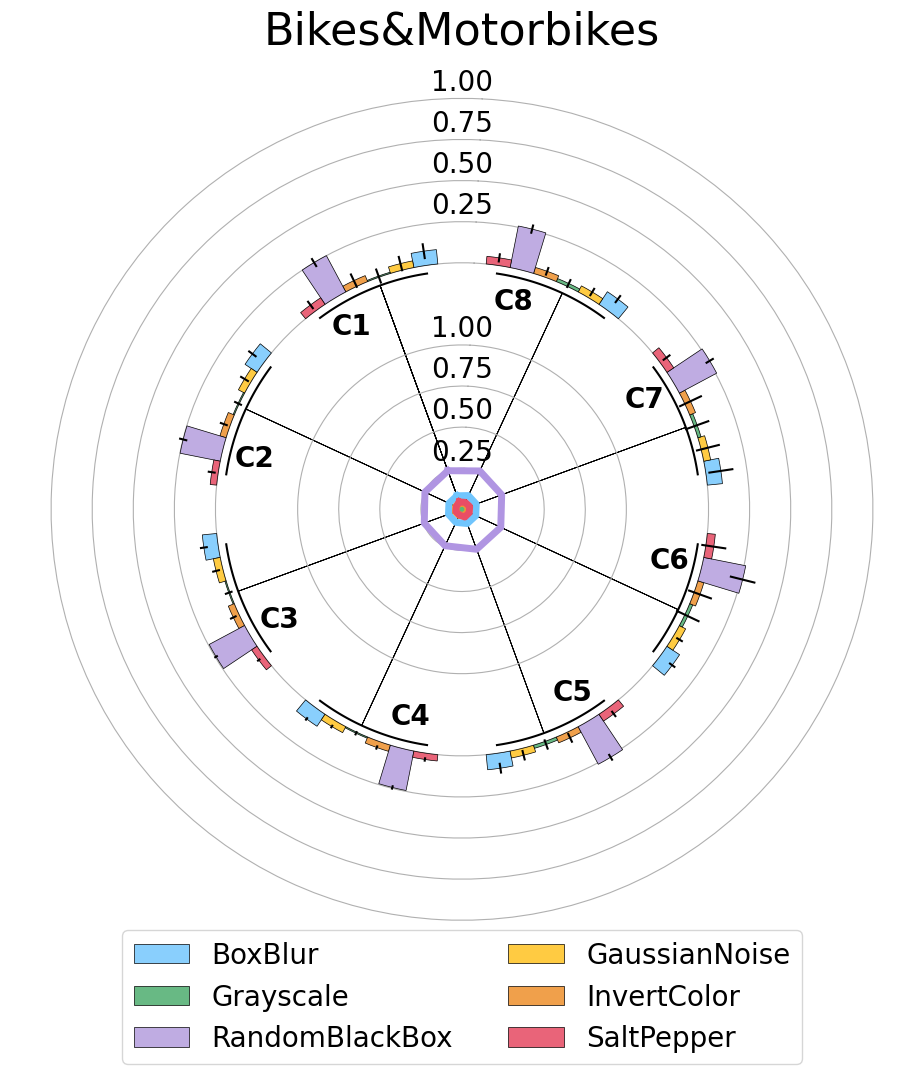

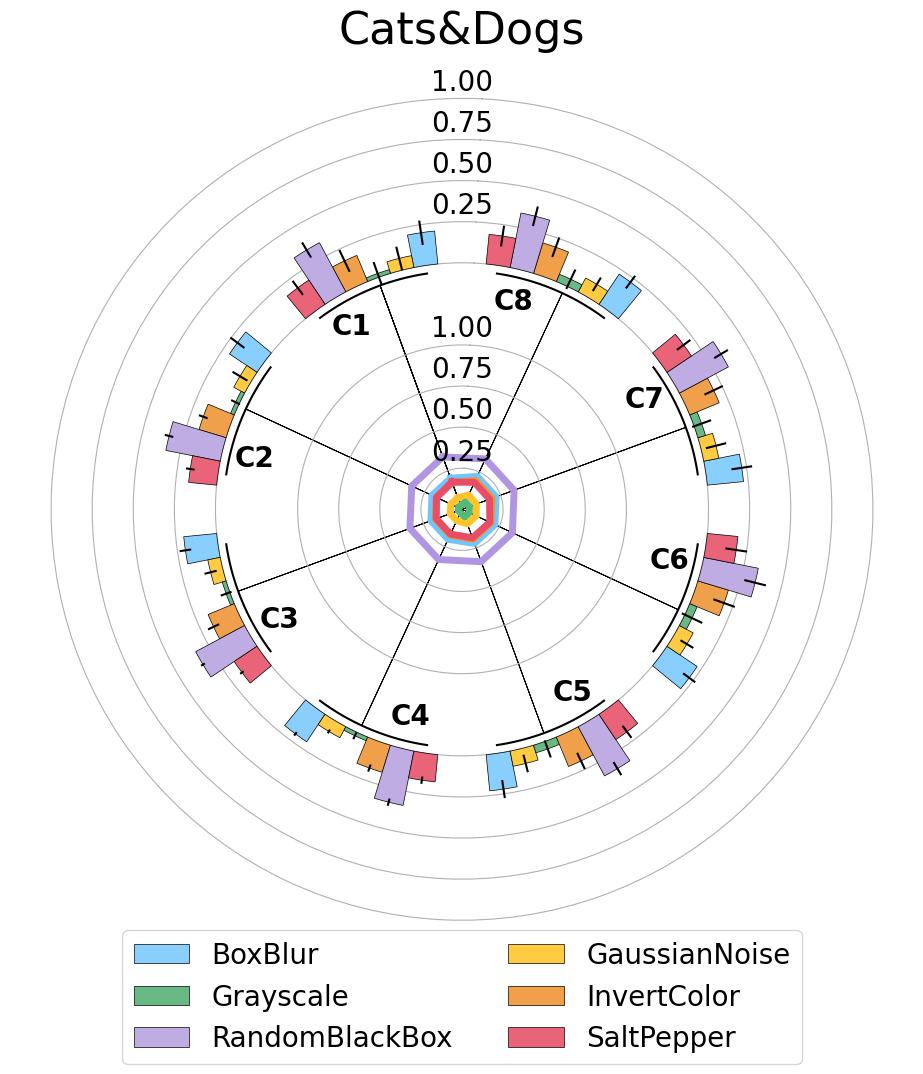

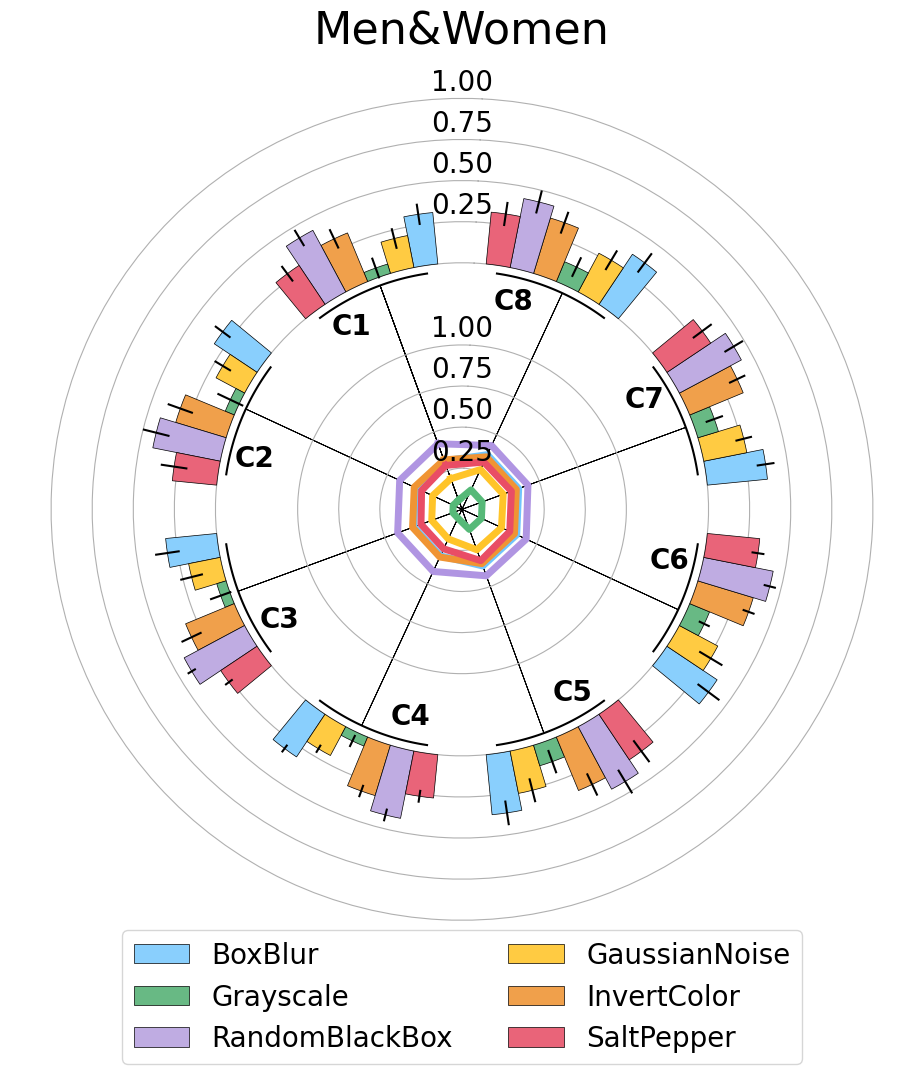

In [13]:
for d in df.Dataset.unique():
    
    #Set the title 
    if d == 'bikeMotorbike':
        title = "Bikes&Motorbikes"
    if d == 'catDog':
        title = "Cats&Dogs"
    if d == 'manWoman':
        title = "Men&Women"

    # Get all the Data
    print("DATASET {}".format(d))
    curr_df = df[df["Dataset"] == d]
    df_chart = curr_df[["attack", "case", "asr"]]
    df_chart = df_chart[df_chart["attack"] != "SplitMergeRGB"]
    error_df = df_chart.groupby(['attack', 'case'], as_index= False).std()
    df_chart = df_chart.groupby(['attack', 'case'], as_index= False).mean()
    df_chart = df_chart.sort_values(["case","attack"])

    # Get the values from the DF
    VALUES      = df_chart["asr"].values
    LABELS      = df_chart["attack"].values
    GROUP       = df_chart["case"].values
    ERRORS      = error_df["asr"].values
    GROUPS_SIZE = [len(list(set(LABELS.tolist())))] * len(list(set(GROUP.tolist())))
   
    # For the Circular Bar Plot
    PAD = 2
    ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
    ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
    WIDTH = (2 * np.pi) / len(ANGLES)
    OFFSET = np.pi / 2 - WIDTH/2

    # Calculate offset for bars considering the padding
    offset = 0
    IDXS = []  
    for size in GROUPS_SIZE:
        IDXS += list(range(offset + PAD, offset + size + PAD))
        offset += size + PAD

    # FIGURE
    fig, ax = plt.subplots(figsize=(10, 12), subplot_kw={"projection": "polar"})
    ax.set_title(title,size=BIGGER_SIZE,pad=10)
    ax.set_frame_on(False)

    # X AXIS
    ax.set_theta_offset(OFFSET)
    ax.xaxis.grid(False)
    ax.set_xticks([])
    
    # Y AXIS
    ax.set_ylim(Y_LIM_START, Y_LIM_END)
    ax.set_yticks(list(np.arange(Y_LIM_START,-0.25,0.25)) + list(np.arange(0,Y_LIM_END,0.25)))
    ax.set_yticklabels([])
    
    # PLOT
    ax.bar(ANGLES[IDXS], VALUES, width=WIDTH, color = COLORS, yerr = ERRORS, edgecolor="black", linewidth=0.5, label=LABELS, zorder=2)

    # LEGEND
    # Handles
    handles, labels = ax.get_legend_handles_labels()
    uniqueLabels = list(set(labels))
    uinqueHandles = [handles[labels.index(label)] for label in uniqueLabels]
  
    sortedHandles, sortedLabels = zip(*sorted(zip(uinqueHandles, uniqueLabels), key=lambda x: x[1]))

    customSortedHandles = []
    customSortedLabels  = []
    customSortedHandles.extend([sortedHandles[0],sortedHandles[2],sortedHandles[4],sortedHandles[1],sortedHandles[3],sortedHandles[5]])
    customSortedLabels.extend([sortedLabels[0],"Grayscale",sortedLabels[4],sortedLabels[1],sortedLabels[3],sortedLabels[5]])

    legendPosition = (0.5, 0.05)
    legendColumns = 2
    ax.legend(customSortedHandles, customSortedLabels, loc='upper center', bbox_to_anchor=legendPosition, ncol=legendColumns)

    # TEXT 
    offset = 0 
    for group, size in zip(["C{}".format(i) for i in range (1,9)], GROUPS_SIZE):
        # Add line below bars
        x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=len(VALUES))
        ax.plot(x1, [-0.05] * len(VALUES), color="black")
    
        # Add text to indicate group
        ax.text(np.mean(x1)+0.15, -0.2, group, color="black", fontsize=SMALL_SIZE,fontweight="bold", ha="center", va="center",zorder=2)
        
        offset += size + PAD 

    for step in np.arange(0.25, Y_LIM_END, 0.25):
        ax.text(OFFSET - np.pi / 2 + WIDTH, step + 0.05, "{:.2f}".format(step), ha="center", size=SMALL_SIZE)
       
    # JOJO
    for a, color in zip(df_chart.attack.unique(), COLORS):  
        y = df_chart[df_chart["attack"] == a]["asr"].tolist()
        y.append(y[0])
        offset = 0.4
        theta = np.linspace(offset, offset + 2*np.pi, 9)

        # convert the RGB color to HSV color and increase sat
        color = mcolors.to_rgb(color)
        hsv_color = mcolors.rgb_to_hsv(color)
        hsv_color[1] += 0.1
        color = mcolors.hsv_to_rgb(hsv_color)

        ax.plot(theta, np.array(y) + Y_LIM_START, color=color,linewidth=5)

        # Add dashed vertical lines. These are just references
        ax.vlines(theta, Y_LIM_START, -0.05, color="black", linewidth=0.5, zorder=0)

        ax.set_xticks([])

    for step in np.arange(Y_LIM_START + 0.25, -0.25, 0.25):
        ax.text(OFFSET - np.pi / 2 + WIDTH, step + 0.05, "{:.2f}".format(step + Y_LIM_END + 0.25), ha="center", size=SMALL_SIZE)

    plt.tight_layout()
    plt.savefig(RESULTS_PATH + "nonMathRadarBarplot_{}.pdf".format(d.replace(" ", "")))